### Railways FRA Data Analysis 
#### (DS 6001 - Final Pipeline)

ARIMA forecasting

In [1]:
import sqlite3
import pandas as pd
import numpy as np
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA

In [2]:
#Connect to db
conn = sqlite3.connect('fra.db')

In [3]:
# # costliest accidents
max_c = pd.read_sql_query('select YEAR4, max(ACCDMG) as cost_of_accident from df_clean group by YEAR4 order by YEAR4', conn)
max_c.head()

,YEAR4,accidents_costs
0,1975,2520110
1,1976,2003110
2,1977,4678640
3,1978,4003620
4,1979,2993850


C:\Users\CHARU\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


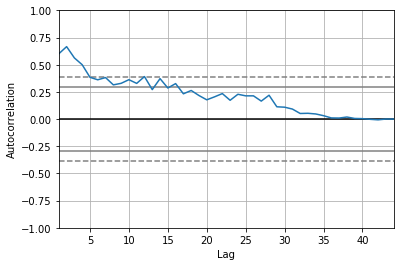

In [7]:
autocorrelation_plot(max_c)

In [5]:
#Making the ARIMA model
#lag value = 5 for autoregression
#difference order = 1 
#moving average model = 0
model = ARIMA(max_c['cost_of_accident'].values, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\CHARU\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\CHARU\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\CHARU\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   43
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -720.404
Method:                       css-mle   S.D. of innovations        4461689.348
Date:                Wed, 12 Dec 2018   AIC                           1454.808
Time:                        21:47:51   BIC                           1467.136
Sample:                             1   HQIC                          1459.354
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.758e+05   3.89e+05      0.709      0.483   -4.87e+05    1.04e+06
ar.L1.D.y     -1.0540      0.151     -6.959      0.000      -1.351      -0.757
ar.L2.D.y     -0.4944      0.211     -2.339      0.0

In [6]:
conn.close()